In [2]:
library(dplyr)
library(ggplot2)

In [17]:
#----------------------------------------------
#* 绘制eGene和eQTL的跨染色体的调控
#----------------------------------------------
plotData <- data.frame(
    QTLid = c(),
    eGene = c(),
    QTLlocal = c(),
    eGenelocal = c(),
    QTL_plot = c(),
    eGene_plot = c(),
    QTLregulation = c(),
    stage=c()
)
for (stage in c("0DPA", "4DPA", "8DPA", "12DPA", "16DPA", "20DPA")) {
    tmpData <- read.table(paste(stage, "_QTL_local_plot.txt", sep = ""),
        header = T, sep = "\t"
    )
    tmpData$stage=stage
    plotData <- rbind(plotData, tmpData)
}


# head(plotData)
#-------------------------------------------------
#* 染色体的累积长度信息
#-------------------------------------------------
chromoseLength <- read.table("Chrom_length.txt", header = F, sep = "\t")
head(plotData)

,QTLid,eGene,QTLlocal,eGenelocal,QTL_plot,eGene_plot,QTLregulation,QTL_effect,stage
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,0DPA_7857QTL,Ghir_A01G000740,Ghir_A01*574525,Ghir_A01*585303,574525,585303,sameSubGenome,0.019,0DPA
2,0DPA_1425QTL,Ghir_A01G000930,Ghir_A01*862634,Ghir_A01*717596,862634,717596,sameSubGenome,0.015,0DPA
3,0DPA_6831QTL,Ghir_A01G001000,Ghir_A01*255346,Ghir_A01*770929,255346,770929,sameSubGenome,0.002,0DPA
4,0DPA_3822QTL,Ghir_A01G001150,Ghir_A01*908007,Ghir_A01*929504,908007,929504,sameSubGenome,0.002,0DPA
5,0DPA_6028QTL,Ghir_A01G001570,Ghir_A01*1281686,Ghir_A01*1368868,1281686,1368868,sameSubGenome,0.060,0DPA
6,0DPA_1826QTL,Ghir_A01G001790,Ghir_A01*1548137,Ghir_A01*1588089,1548137,1588089,sameSubGenome,0.002,0DPA


In [18]:
plotData_test= plotData %>% filter(stage=="12DPA")

In [19]:
head(chromoseLength)

,V1,V2,V3,V4,V5,V6
,<fct>,<int>,<dbl>,<int>,<int>,<dbl>
1,Ghir_A01,117757855,10,80,81,117757855
2,Ghir_A02,108092100,119229849,80,81,225849955
3,Ghir_A03,113059412,228673111,80,81,338909367
4,Ghir_A04,85149810,343145776,80,81,424059177
5,Ghir_A05,109419610,429359969,80,81,533478787
6,Ghir_A06,124056332,540147335,80,81,657535119


Warning message:
“Ignoring unknown parameters: inherit.aes”
Warning message:
“Ignoring unknown parameters: inherit.aes”


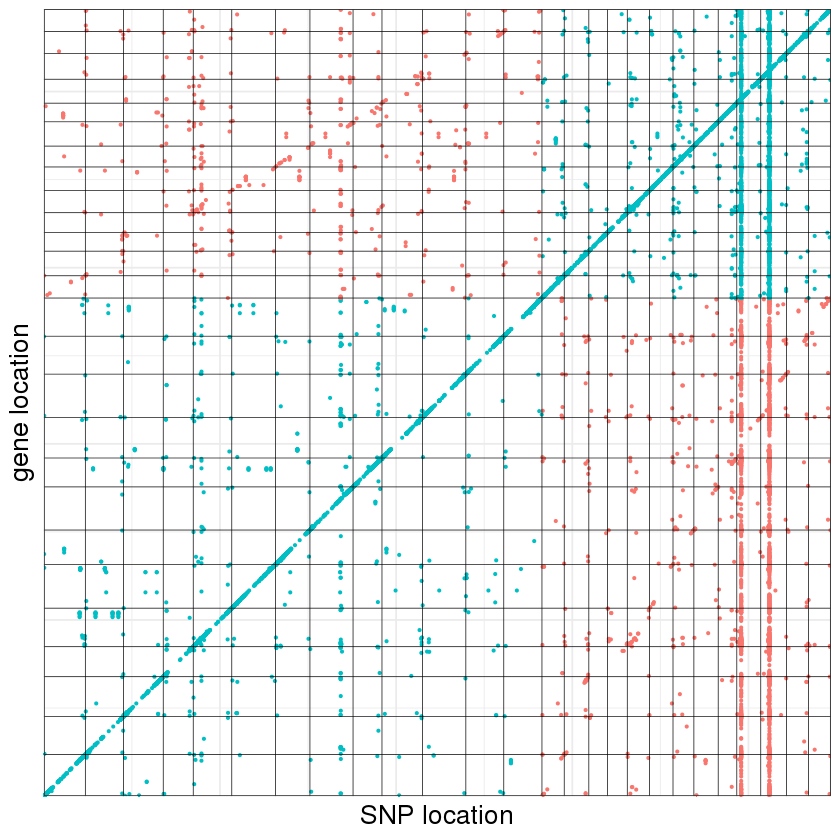

In [20]:
ggplot(plotData_test, aes(x = QTL_plot, y = eGene_plot, color = QTLregulation)) +
    geom_point(
        size = 0.5
    ) +
    theme_bw()+
    geom_hline(
        data = chromoseLength,
        aes(yintercept = V6),
        inherit.aes = F,
        size=0.2
    ) +
    geom_vline(
        data = chromoseLength,
        aes(xintercept = V6),
        inherit.aes = F,
        size=0.2
    ) +
    scale_x_continuous(
        expand = c(0., 0)
    ) +
    scale_y_continuous(
        expand = c(0., 0)
    )+
    theme(
        legend.position = 'none',
        axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title = element_text(size=16)
    )+xlab("SNP location")+
    ylab("gene location")

In [3]:
#--------------------------------------------------
#* 绘制各个时期的eGene在两个亚组间受到跨亚组调控的比例
#--------------------------------------------------
#加载相关扩展包
library(ggradar)  
library(dplyr)
library(scales)
           

#利用dplyr管道操作符重组绘图对象
# mtcars%>%
#   rownames_to_column(var = "group" )%>%
#   mutate_each(funs(rescale), -group)%>%
#   tail(4)%>% select(1:10) -> mtcars_radar
#ggradar函数绘制雷达图
#ggradar(mtcars_radar)

In [4]:
#-------------------------------------------
#* 统计受到跨亚组调控的eGene的比例
#-------------------------------------------
plotData <- data.frame(
    group = c("At", "Dt"),
    intra_genome_0DPA = c(3296, 3688),
    inter_genome_0DPA = c(723, 329),
    intra_genome_4DPA = c(3330, 3446),
    inter_genome_4DPA = c(448, 351),
    intra_genome_8DPA = c(3581, 3554),
    inter_genome_8DPA = c(314, 396),
    intra_genome_12DPA = c(3044, 4482),
    inter_genome_12DPA = c(1822, 393),
    intra_genome_16DPA = c(2987, 3319),
    inter_genome_16DPA = c(625, 349),
    intra_genome_20DPA = c(2883, 2896),
    inter_genome_20DPA = c(328, 351)
)
plotData <- plotData %>%
    mutate(
        ratio_0PA = inter_genome_0DPA / (inter_genome_0DPA + intra_genome_0DPA),
        ratio_4PA = inter_genome_4DPA / (inter_genome_4DPA + intra_genome_4DPA),
        ratio_8PA = inter_genome_8DPA / (inter_genome_8DPA + intra_genome_8DPA),
        ratio_12PA = inter_genome_12DPA / (inter_genome_12DPA + intra_genome_12DPA),
        ratio_16PA = inter_genome_16DPA / (inter_genome_16DPA + intra_genome_16DPA),
        ratio_20PA = inter_genome_20DPA / (inter_genome_20DPA + intra_genome_20DPA)
    ) %>%
    select("group"|starts_with("ratio"))

In [14]:
head(plotData)

,group,ratio_0PA,ratio_4PA,ratio_8PA,ratio_12PA,ratio_16PA,ratio_20PA
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,At,0.17989550,0.1185813,0.08061617,0.37443485,0.17303433,0.1021489
2,Dt,0.08190192,0.0924414,0.10025316,0.08061538,0.09514722,0.1080998


png 
  2

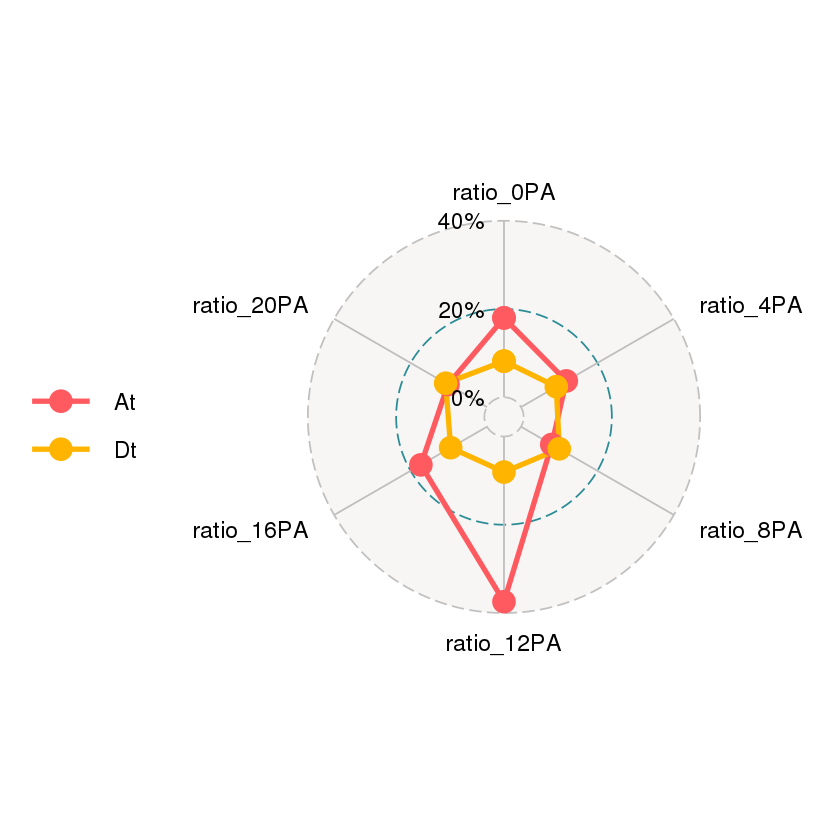

In [6]:
p=plotData %>%
  ggradar(
    font.radar = "Circular Air",
    values.radar = c("0%", "20%", "40%"),
    grid.min = 0,
    grid.mid = 0.2,
    grid.max = 0.4
  )
 svg("subgenome_eQTL_regulation.svg") 
 print(p)
 dev.off()
 print(p)